In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### Importing and reformatting the data we are working with

In [3]:
# Pittsburgh Police Arrest Data

pgh_arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

# Pittsburgh American Community Survey 2015 - Miscellaneous Data 

pop_data = pd.read_csv('total-population.csv', index_col="Neighborhood")

##Reformat

pgh_arrest_data = pgh_arrest_data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Offenses'})
arrest_data = pgh_arrest_data.loc[:,["Offenses","Neighborhood"]].groupby('Neighborhood').count()
arrest_data.head()

,Offenses
Neighborhood,
Allegheny Center,659
Allegheny West,75
Allentown,542
Arlington,169
Arlington Heights,101


### Adding population & Offenses per Capita
If we only look at the number of offenses, we completely ignore the fact that **more people = more crime**. Thus, we will look at the ratio of crime to people. We add the population onto our data frame, and, from here, we divide the number of offenses by the estimated population to get the number of crimes per person in the neighborhood.

In [11]:
population = pop_data.loc[:,"Estimate; Total"]
arrest_data['Estimated Population'] = population
arrest_data['Offenses per Capita'] = arrest_data.loc[:,"Offenses"]/arrest_data.loc[:,'Estimated Population']
arrest_data.dropna()
arrest_data.head()

,Offenses,Estimated Population,Offenses per Capita
Neighborhood,,,
Allegheny Center,653,1411.0,0.462792
Allegheny West,75,343.0,0.218659
Allentown,539,2558.0,0.210711
Arlington,168,1852.0,0.090713
Arlington Heights,100,272.0,0.367647


### Filter
To make plotting nicer (**actually readable**), we drop all neighborhoods with more than 3 crimes per 100 people.

In [28]:
arrest_data_filtered = arrest_data[arrest_data['Offenses per Capita']<.03].sort_values("Offenses per Capita")
arrest_data_filtered

,Offenses,Estimated Population,Offenses per Capita
Neighborhood,,,
Central Northside,23,2892.0,0.007953
Squirrel Hill North,151,11336.0,0.013320
Swisshelm Park,20,1345.0,0.014870
Regent Square,19,1033.0,0.018393
New Homestead,22,973.0,0.022610
North Oakland,223,9602.0,0.023224
Stanton Heights,115,4761.0,0.024155
Squirrel Hill South,443,16042.0,0.027615
Lincoln Place,101,3499.0,0.028865


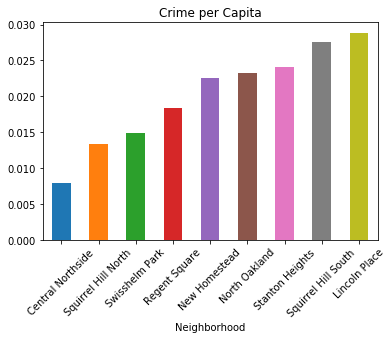

In [29]:
arrest_data_filtered.loc[:,'Offenses per Capita'].plot(kind="bar", title = "Crime per Capita", rot=45)